# Hypothesis test + Clustering

### 2 sample t-test

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
NBA_4th = pd.read_csv("data/NBA_4th_comp.csv")
first_3 = pd.read_csv("data/first_3_comp.csv")

In [3]:
first_3.columns

Index(['index', 'TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'COURT', 'Opponent',
       'OppPTS', 'OppFGM', 'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%',
       'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB', 'OppREB', 'OppAST',
       'OppTOV', 'OppSTL', 'OppBLK', 'OppPF', 'Pos', 'OppPos', 'Pace',
       'OFFRTG', 'DEFRTG', 'Margin', 'formatted_date', 'week_of_season',
       'PTS/Q'],
      dtype='object')

In [4]:
# H0: first 3 quarter = 4th quarter

columns = ['Pace','OFFRTG','DEFRTG',"3P%","AST",'FT%']
for col in columns:
    t_stat, p_val = stats.ttest_ind(NBA_4th[col], first_3[col])
    print("p value for %s: " % (col) + str(p_val) +" and the statistic: " + str(t_stat))

p value for Pace: 2.5703488123523338e-115 and the statistic: -23.573392663179916
p value for OFFRTG: 0.6731949813303986 and the statistic: 0.42179752362989176
p value for DEFRTG: 0.6731949813303812 and the statistic: 0.4217975236299151
p value for 3P%: 0.0 and the statistic: 85.97462692789428
p value for AST: 0.0 and the statistic: -132.1146149441038
p value for FT%: 0.0 and the statistic: 126.24337384047551


- Reject H0 at the 95% confidence interval for Pace, AST, 3P%, 'PTS', 'FT%
- Can´t reject H0 for DEFRTG and OFFRTG

### KMeans Clustering

In [5]:
teams_3rd = first_3.pivot_table(index = "TEAM", values = ["DEFRTG","OFFRTG"], aggfunc = np.mean)
teams_4th = NBA_4th.pivot_table(index = "TEAM", values = ["DEFRTG","OFFRTG"], aggfunc = np.mean)
teams_3rd[["DEFRTG_4th","OFFRTG_4th"]] = teams_4th[["DEFRTG","OFFRTG"]]
teams_3rd

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
ATL,116.624969,117.035673,114.161390,110.332808
BKN,113.515708,114.937408,111.305306,110.241938
BOS,107.380896,110.668632,112.215981,112.872153
CHA,113.948561,113.462007,108.893058,114.119936
CHI,112.702629,112.956782,114.976167,118.701130
CLE,110.760205,110.264056,114.277824,112.744565
DAL,110.038357,112.475246,107.110677,108.509729
DEN,111.465458,114.395260,116.466644,108.150348
DET,112.895421,109.874105,110.798256,105.087445


In [6]:
samples = teams_3rd.to_numpy()

In [7]:
classifier = KMeans(n_clusters = 4, random_state = 1)
classifier.fit(samples)


KMeans(n_clusters=4, random_state=1)

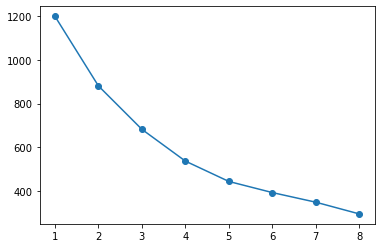

In [8]:
# Four clusters are a good fit

num_clusters = list(range(1,9))
inertias =  []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

In [9]:
classifier.labels_

array([2, 1, 0, 1, 3, 0, 1, 2, 0, 1, 2, 2, 0, 0, 3, 1, 1, 2, 3, 0, 0, 0,
       1, 3, 2, 2, 1, 3, 1, 3], dtype=int32)

In [10]:
cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []
cluster_three_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif classifier.labels_[i] == 2:
        cluster_two_indices.append(i)
    elif classifier.labels_[i] == 3:
        cluster_three_indices.append(i)        
print(cluster_zero_indices)

[2, 5, 8, 12, 13, 19, 20, 21]


In [11]:
# Teams with bad defense in the 4th

cluster_zero_df = teams_3rd.iloc[cluster_zero_indices]
cluster_zero_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
BOS,107.380896,110.668632,112.215981,112.872153
CLE,110.760205,110.264056,114.277824,112.744565
DET,112.895421,109.874105,110.798256,105.087445
LAC,109.957685,107.669562,111.161375,114.433841
LAL,113.586920,111.051695,111.219826,111.334863
NYK,110.565058,111.142655,111.123822,108.072345
OKC,109.672851,104.247655,110.449047,109.338482
ORL,109.389130,104.366686,114.399555,111.615125


In [12]:
# The worst group: bad defense and/or bad offense

cluster_one_df = teams_3rd.iloc[cluster_one_indices]
cluster_one_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
BKN,113.515708,114.937408,111.305306,110.241938
CHA,113.948561,113.462007,108.893058,114.119936
DAL,110.038357,112.475246,107.110677,108.509729
GSW,108.409172,112.724828,106.972879,111.355693
MIA,109.923000,114.092897,108.903138,113.749722
MIL,113.553476,114.185755,105.401196,115.939234
PHI,110.935685,115.332392,108.171559,111.186858
SAS,113.284729,112.288170,110.197431,110.058777
UTA,111.562522,116.609463,112.138766,114.310280


In [13]:
# Elite group: good in the first 3 and in the 4th improved their defense and/or offense

cluster_two_df = teams_3rd.iloc[cluster_two_indices]
cluster_two_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
ATL,116.624969,117.035673,114.161390,110.332808
DEN,111.465458,114.395260,116.466644,108.150348
HOU,115.061222,109.716574,116.952996,110.222191
IND,116.415883,113.338467,113.391555,112.778354
MIN,112.296966,113.428980,115.547031,111.025345
POR,114.666109,112.293438,119.892411,105.059341
SAC,114.647440,111.433552,117.000698,109.504678


In [14]:
# Good teams in the first 3 quarters, but declined in the 4th quarter

cluster_three_df = teams_3rd.iloc[cluster_three_indices]
cluster_three_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
TEAM,,,,
CHI,112.702629,112.956782,114.976167,118.701130
MEM,108.802726,112.750489,112.730440,115.299347
NOP,111.739120,109.568484,116.245159,116.159558
PHX,108.336707,111.269656,109.045913,122.864011
TOR,111.430002,112.627522,111.314064,116.962493
WAS,114.864709,111.852230,115.062771,116.117834
